# Kaggle Competition: House Prices: Advanced Regression Techniques

El objetivo de [esta competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) es **predecir el precio de las casas** en Ames, Iowa, utilizando un conjunto de datos de entrenamiento que contiene 79 variables. La métrica de evaluación es el **error cuadrático medio** (RMSE).

![image](https://www.kaggle.com/competitions/5407/images/header)


## 1. Cargar los datos

Como siempre en un proyecto de Machine Learning, lo primero que debemos hacer es cargar los datos. Para ello, seguiremos los siguientes pasos:

1. Darnos de alta en la plataforma de [Kaggle](https://www.kaggle.com/)
2. [Registrarnos en la competición](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview).
3. Descargar los datos. Para ello nos dirigimos a la pestaña `Data` y descargamos el zip con los archivos: `train.csv`, `test.csv`, `data_description.txt` y `sample_submission.csv`, 
4. Los colocamos dentro de una carpeta llamada `data` en la raíz del proyecto. Recuerda que no subimos los datos a GitHub.
5. Cargamos los datos en un DataFrame de pandas.

In [1]:
import pandas as pd


TRAIN_CSV = '../data/train.csv'
TEST_CSV = '../data/test.csv'


train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
all_data_df = pd.concat([train_df, test_df], keys=['train', 'test'])
all_data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
train 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

        MoSold YrSold  SaleType  SaleCondition  SalePrice  
train 0      2   2008        WD         Normal   208500.0  
      1      5   2007        WD         Normal   181500.0  
      2      9   2008        WD         Normal   223500.0  
      3      2   2006        WD        Abnorml   140000.0  
      4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [2]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', 0) to ('test', 1458)
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   

Para este ejercicio vamos a simplificar el problema y vamos a reducir el número de variables a utilizar a un set de 10 variables más manejables.

| **Nombre**        | **Descripción**                                                                                                   | **Valoración**                                                                                                                                                                     |
|---------------|---------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **OverallQual**   | Calificación de la calidad general de los materiales y acabados (1 a 10).                                     | Es crucial para la predicción del precio, ya que la calidad de construcción y acabados afecta directamente la percepción de valor y atractivo de la propiedad.                   |
| **GrLivArea**     | Área habitable sobre el nivel del suelo en pies cuadrados.                                                    | Un mayor espacio habitable es más deseable y puede alojar a más personas, incrementando la utilidad y valor de la casa.                                                        |
| **Neighborhood**  | Vecindario dentro de los límites de la ciudad de Ames.                                                        | La ubicación puede influir en la seguridad, acceso a servicios, escuelas y otros factores que afectan la calidad de vida, siendo un factor clave en el valor de la propiedad.    |
| **YearBuilt**     | Año de construcción de la casa.                                                                               | Las casas más nuevas suelen tener instalaciones modernas y menos problemas de mantenimiento, lo cual puede elevar el precio de la propiedad.                                   |
| **GarageCars**    | Capacidad del garaje en términos de número de coches.                                                         | Es un indicador de conveniencia y almacenamiento adicional, factores valorados por los compradores, especialmente en áreas suburbanas.                                          |
| **TotalBsmtSF**   | Área total del sótano en pies cuadrados.                                                                      | Un sótano más grande puede incrementar el espacio utilizable, lo que es atractivo para los compradores y puede aumentar el valor de la propiedad.                               |
| **KitchenQual**   | Califica la calidad de la cocina (Ex a Po).                                                                   | La calidad de la cocina puede influir notablemente en la decisión de compra y la disposición a pagar más, ya que es una de las áreas más importantes de una casa.              |
| **FullBath**      | Número de baños completos sobre el nivel del suelo.                                                           | Más baños completos incrementan la comodidad y funcionalidad de la vivienda, especialmente en familias numerosas, siendo un aspecto muy valorado.                               |
| **MSZoning**      | Clasificación general de la zona de la propiedad (Agrícola, Comercial, Residencial, etc.).                    | Afecta las regulaciones y el uso permitido de la propiedad, influyendo en su valor y en las posibilidades de desarrollo o remodelación.                                         |
| **LotArea**       | Tamaño del lote en pies cuadrados.                                                                            | Un terreno más grande puede ofrecer más privacidad, espacio para actividades al aire libre o futuras ampliaciones de la casa, aumentando su atractivo y valor.                  |

In [3]:
selected_columns = [
    "OverallQual",
    "GrLivArea",
    "Neighborhood",
    "YearBuilt",
    "GarageCars",
    "TotalBsmtSF",
    "KitchenQual",
    "FullBath",
    "MSZoning",
    "LotArea",
    "MSSubClass",
    "LotShape",
    "Utilities",
    "Condition1",
    "Condition2",
    "HouseStyle",
    "OverallCond",
    "ExterQual",
    "ExterCond",
    "BsmtCond",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "YrSold",
    "SalePrice",   # incluímos la variable objetivo
]

all_data_df = all_data_df[selected_columns]
all_data_df

OverallQual  GrLivArea Neighborhood  YearBuilt  GarageCars  \
train 0               7       1710      CollgCr       2003         2.0   
      1               6       1262      Veenker       1976         2.0   
      2               7       1786      CollgCr       2001         2.0   
      3               7       1717      Crawfor       1915         3.0   
      4               8       2198      NoRidge       2000         3.0   
...                 ...        ...          ...        ...         ...   
test  1454            4       1092      MeadowV       1970         0.0   
      1455            4       1092      MeadowV       1970         1.0   
      1456            5       1224      Mitchel       1960         2.0   
      1457            5        970      Mitchel       1992         0.0   
      1458            7       2000      Mitchel       1993         3.0   

            TotalBsmtSF KitchenQual  FullBath MSZoning  LotArea  ...  \
train 0           856.0          Gd         2       RL     8450  ...   
      1          1262.0          TA         2       RL     9600  ...   
      2           920.0          Gd         2       RL    11250  ...   
      3           756.0          Gd         1       RL     9550  ...   
      4          1145.0          Gd         2       RL    14260  ...   
...                 ...         ...       ...      ...      ...  ...   
test  1454        546.0          TA         1       RM     1936  ...   
      1455        546.0          TA         1       RM     1894  ...   
      1456       1224.0          TA         1       RL    20000  ...   
      1457        912.0          TA         1       RL    10441  ...   
      1458        996.0          TA         2       RL     9627  ...   

            ExterQual ExterCond BsmtCond HeatingQC CentralAir Electrical  \
train 0            Gd        TA       TA        Ex          Y      SBrkr   
      1            TA        TA       TA        Ex          Y      SBrkr   
      2            Gd        TA       TA        Ex          Y      SBrkr   
      3            TA        TA       Gd        Gd          Y      SBrkr   
      4            Gd        TA       TA        Ex          Y      SBrkr   
...               ...       ...      ...       ...        ...        ...   
test  1454         TA        TA       TA        Gd          Y      SBrkr   
      1455         TA        TA       TA        TA          Y      SBrkr   
      1456         TA        TA       TA        Ex          Y      SBrkr   
      1457         TA        TA       TA        TA          Y      SBrkr   
      1458         TA        TA       TA        Ex          Y      SBrkr   

            BedroomAbvGr KitchenAbvGr YrSold SalePrice  
train 0                3            1   2008  208500.0  
      1                3            1   2007  181500.0  
      2                3            1   2008  223500.0  
      3                3            1   2006  140000.0  
      4                4            1   2008  250000.0  
...                  ...          ...    ...       ...  
test  1454             3            1   2006       NaN  
      1455             3            1   2006       NaN  
      1456             4            1   2006       NaN  
      1457             3            1   2006       NaN  
      1458             3            1   2006       NaN  

[2919 rows x 27 columns]

## 2. Explorar los datos (EDA)

Una vez que hemos cargado los datos, el siguiente paso es explorarlos. Para ello, seguiremos los siguientes pasos:


1. Mostrar un resumen de los datos.


In [4]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', 0) to ('test', 1458)
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   GrLivArea     2919 non-null   int64  
 2   Neighborhood  2919 non-null   object 
 3   YearBuilt     2919 non-null   int64  
 4   GarageCars    2918 non-null   float64
 5   TotalBsmtSF   2918 non-null   float64
 6   KitchenQual   2918 non-null   object 
 7   FullBath      2919 non-null   int64  
 8   MSZoning      2915 non-null   object 
 9   LotArea       2919 non-null   int64  
 10  MSSubClass    2919 non-null   int64  
 11  LotShape      2919 non-null   object 
 12  Utilities     2917 non-null   object 
 13  Condition1    2919 non-null   object 
 14  Condition2    2919 non-null   object 
 15  HouseStyle    2919 non-null   object 
 16  OverallCond   2919 non-null   int64  
 17  ExterQual     2919 non-null   object 
 18  ExterCo

2. Mostrar un resumen de los datos categóricos.


In [5]:
all_data_df.describe(include='object').T

,count,unique,top,freq
Neighborhood,2919,25,NAmes,443
KitchenQual,2918,4,TA,1492
MSZoning,2915,5,RL,2265
LotShape,2919,4,Reg,1859
Utilities,2917,2,AllPub,2916
Condition1,2919,9,Norm,2511
Condition2,2919,8,Norm,2889
HouseStyle,2919,8,1Story,1471
ExterQual,2919,4,TA,1798
ExterCond,2919,5,TA,2538


3. Mostrar un resumen de los datos numéricos.


In [6]:
all_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
GrLivArea,2919.0,1500.759849,506.051045,334.0,1126.0,1444.0,1743.5,5642.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
GarageCars,2918.0,1.766621,0.761624,0.0,1.0,2.0,2.0,5.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,793.0,989.5,1302.0,6110.0
FullBath,2919.0,1.568003,0.552969,0.0,1.0,2.0,2.0,4.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
BedroomAbvGr,2919.0,2.860226,0.822693,0.0,2.0,3.0,3.0,8.0


4. Mostrar un resumen de los datos nulos.


In [7]:
all_data_df.isnull().sum()

OverallQual        0
GrLivArea          0
Neighborhood       0
YearBuilt          0
GarageCars         1
TotalBsmtSF        1
KitchenQual        1
FullBath           0
MSZoning           4
LotArea            0
MSSubClass         0
LotShape           0
Utilities          2
Condition1         0
Condition2         0
HouseStyle         0
OverallCond        0
ExterQual          0
ExterCond          0
BsmtCond          82
HeatingQC          0
CentralAir         0
Electrical         1
BedroomAbvGr       0
KitchenAbvGr       0
YrSold             0
SalePrice       1459
dtype: int64

5. Visualizar la distribución de la variable objetivo.


Text(0.5, 1.0, 'Distribución de la variable objetivo: SalePrice')

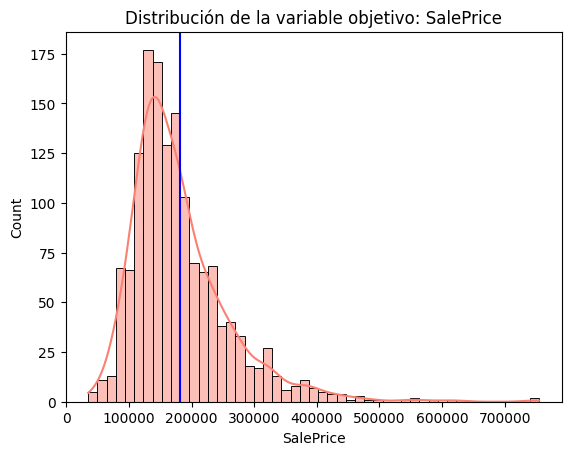

In [8]:
import seaborn as sns


y = all_data_df['SalePrice']
ax = sns.histplot(y, kde=True, color='salmon')
ax.axvline(y.mean(), color='blue')
ax.set_title('Distribución de la variable objetivo: SalePrice')

6. Visualizar la correlación entre las variables numéricas.


Text(0.5, 1.0, 'Matriz de correlación')

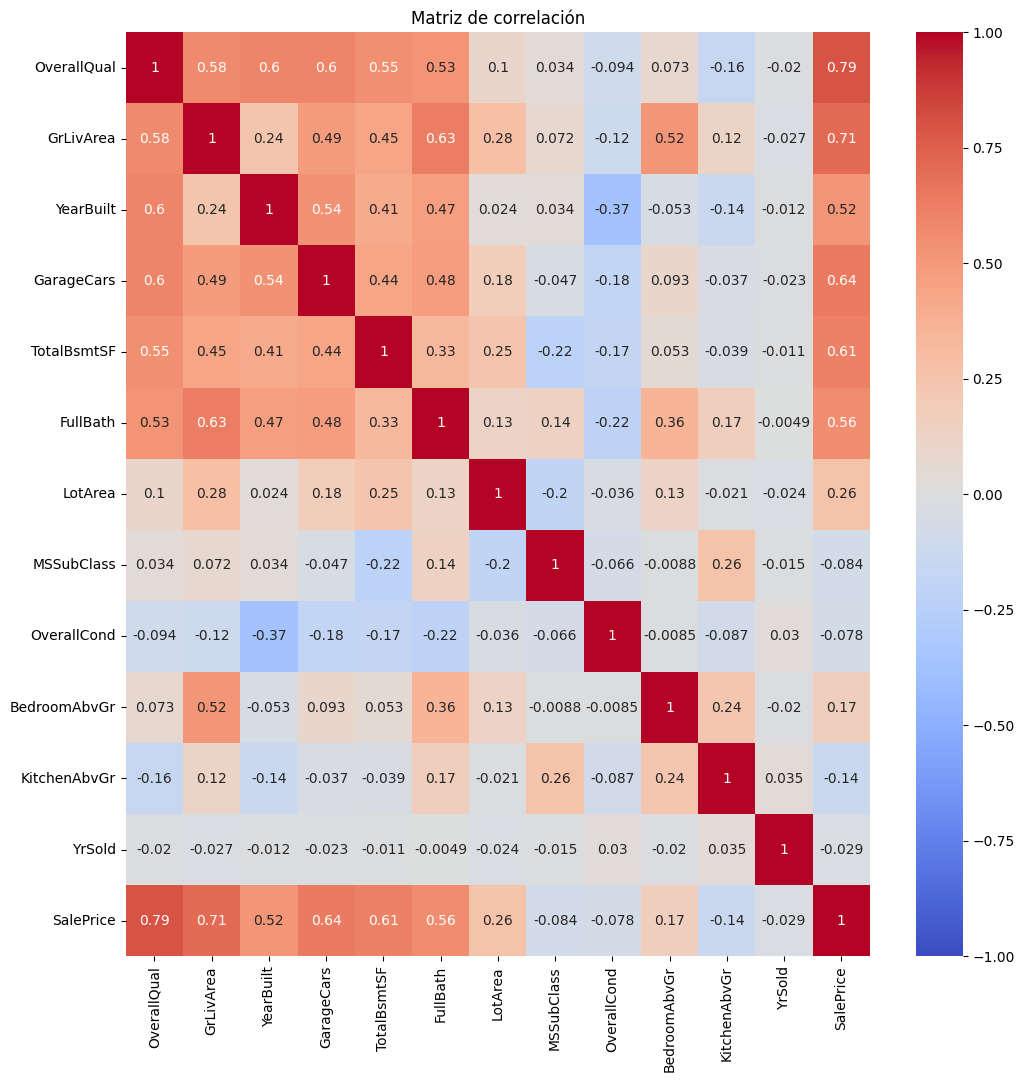

In [9]:
import matplotlib.pyplot as plt

corr_matrix = all_data_df.corr(numeric_only=True)
plt.figure(figsize=(12,12))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_title('Matriz de correlación')

## 3. Preprocesamiento de los datos

Una vez que hemos explorado los datos, el siguiente paso es preprocesarlos. Para ello, seguiremos los siguientes pasos:

1. Tratar los datos nulos.
2. Codificar las variables categóricas.
3. Normalizar las variables numéricas.

In [10]:
X = all_data_df.drop(columns='SalePrice')
y = all_data_df['SalePrice']

### 3.1 Tratar los datos nulos

Vamos a ver cuantos datos nulos tenemos

In [11]:
X.isnull().sum()

OverallQual      0
GrLivArea        0
Neighborhood     0
YearBuilt        0
GarageCars       1
TotalBsmtSF      1
KitchenQual      1
FullBath         0
MSZoning         4
LotArea          0
MSSubClass       0
LotShape         0
Utilities        2
Condition1       0
Condition2       0
HouseStyle       0
OverallCond      0
ExterQual        0
ExterCond        0
BsmtCond        82
HeatingQC        0
CentralAir       0
Electrical       1
BedroomAbvGr     0
KitchenAbvGr     0
YrSold           0
dtype: int64

Vamos a imputar los valores nulos de las variables categóricas con la moda y los valores nulos de las variables numéricas con la media.

In [12]:
# Rellenamos con la moda las variabbles categóricas
def fill_df_column_with_mode(df, column):
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)
    return df

X = fill_df_column_with_mode(X, 'Utilities')
X = fill_df_column_with_mode(X, 'BsmtCond')
X = fill_df_column_with_mode(X, 'MSZoning')
X = fill_df_column_with_mode(X, 'KitchenQual')
X = fill_df_column_with_mode(X, 'Electrical')
X = fill_df_column_with_mode(X, 'GarageCars')



In [13]:
# Rellenamos con la media las variables numéricas
# La función mean() nos devuelve un único valor numérico por lo que no necesitamos indexar (no es un array o lista)
def fill_df_column_with_mean(df, column):
    mean = df[column].mean()
    df[column] = df[column].fillna(mean)
    return df

X = fill_df_column_with_mean(X, 'TotalBsmtSF')

Confirmamos que no hay valores nulos.

In [14]:
X.isnull().sum()

OverallQual     0
GrLivArea       0
Neighborhood    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
KitchenQual     0
FullBath        0
MSZoning        0
LotArea         0
MSSubClass      0
LotShape        0
Utilities       0
Condition1      0
Condition2      0
HouseStyle      0
OverallCond     0
ExterQual       0
ExterCond       0
BsmtCond        0
HeatingQC       0
CentralAir      0
Electrical      0
BedroomAbvGr    0
KitchenAbvGr    0
YrSold          0
dtype: int64

### 3.2 Normalizar las variables numéricas

Normalizar las variables numéricas es un paso importante en el preprocesamiento de los datos ya que permite que las variables tengan la misma escala, evitando que unas variables tengan más peso que otras en el modelo de Machine Learning. Para ello, utilizaremos el `StandardScaler` de `scikit-learn`.

El `StandardScaler` transforma las variables de forma que tengan media 0 y desviación estándar 1. Se diferencia del `MinMaxScaler` en que no transforma las variables a un rango específico, sino que las normaliza.

Veamos las variables numéricas que vamos a normalizar.

In [15]:
X.describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,MSSubClass,OverallCond,BedroomAbvGr,KitchenAbvGr,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,6.089072,1500.759849,1971.312778,1.766701,1051.777587,1.568003,10168.114080,57.137718,5.564577,2.860226,1.044536,2007.792737
std,1.409947,506.051045,30.291442,0.761506,440.690726,0.552969,7886.996359,42.517628,1.113131,0.822693,0.214462,1.314964
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000,20.000000,1.000000,0.000000,0.000000,2006.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000,20.000000,5.000000,2.000000,1.000000,2007.000000
50%,6.000000,1444.000000,1973.000000,2.000000,990.000000,2.000000,9453.000000,50.000000,5.000000,3.000000,1.000000,2008.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000,70.000000,6.000000,3.000000,1.000000,2009.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000,190.000000,9.000000,8.000000,3.000000,2010.000000


Vamos a normalizar las variables numéricas utilizando el `StandardScaler`.

In [16]:
numeric_columns = [
    "GrLivArea",
    "YearBuilt",
    "TotalBsmtSF",
    "LotArea",
    "YrSold",
    ]
X_numeric_df = X[numeric_columns]
X_numeric_df.head()

GrLivArea  YearBuilt  TotalBsmtSF  LotArea  YrSold
train 0       1710       2003        856.0     8450    2008
      1       1262       1976       1262.0     9600    2007
      2       1786       2001        920.0    11250    2008
      3       1717       1915        756.0     9550    2006
      4       2198       2000       1145.0    14260    2008

In [17]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_numeric_scaled_data = scaler.fit_transform(X_numeric_df)
X_numeric_scaled_data

array([[ 0.41354722,  1.0462576 , -0.44432778, -0.21787869,  0.15764553],
       [-0.47189065,  0.154764  ,  0.47711109, -0.07204408, -0.60296158],
       [ 0.56375543,  0.98022103, -0.29907633,  0.13719688,  0.15764553],
       ...,
       [-0.54699476, -0.3735285 ,  0.39086804,  1.24680804, -1.36356868],
       [-1.0490064 ,  0.6830565 , -0.31723276,  0.0346054 , -1.36356868],
       [ 0.98671012,  0.71607478, -0.12659024, -0.06862014, -1.36356868]])

In [18]:
# keep indexes "train" and "test" to split the data later
X_numeric_scaled_df = pd.DataFrame(
    X_numeric_scaled_data,
    index=X_numeric_df.index,
    columns=X_numeric_df.columns,
)
X_numeric_scaled_df.head()

GrLivArea  YearBuilt  TotalBsmtSF   LotArea    YrSold
train 0   0.413547   1.046258    -0.444328 -0.217879  0.157646
      1  -0.471891   0.154764     0.477111 -0.072044 -0.602962
      2   0.563755   0.980221    -0.299076  0.137197  0.157646
      3   0.427382  -1.859351    -0.671283 -0.078385 -1.363569
      4   1.378042   0.947203     0.211573  0.518903  0.157646

### 3.3 Codificar las variables categóricas

Recordemos que las variables categóricas deben ser codificadas para poder ser utilizadas en un modelo de Machine Learning. Para ello, utilizaremos el `LabelEncoder` de `scikit-learn`. Primero veamos cuales son las variables categóricas.

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', 0) to ('test', 1458)
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   GrLivArea     2919 non-null   int64  
 2   Neighborhood  2919 non-null   object 
 3   YearBuilt     2919 non-null   int64  
 4   GarageCars    2919 non-null   float64
 5   TotalBsmtSF   2919 non-null   float64
 6   KitchenQual   2919 non-null   object 
 7   FullBath      2919 non-null   int64  
 8   MSZoning      2919 non-null   object 
 9   LotArea       2919 non-null   int64  
 10  MSSubClass    2919 non-null   int64  
 11  LotShape      2919 non-null   object 
 12  Utilities     2919 non-null   object 
 13  Condition1    2919 non-null   object 
 14  Condition2    2919 non-null   object 
 15  HouseStyle    2919 non-null   object 
 16  OverallCond   2919 non-null   int64  
 17  ExterQual     2919 non-null   object 
 18  ExterCo

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, ('train', 0) to ('test', 1458)
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   GrLivArea     2919 non-null   int64  
 2   Neighborhood  2919 non-null   object 
 3   YearBuilt     2919 non-null   int64  
 4   GarageCars    2919 non-null   float64
 5   TotalBsmtSF   2919 non-null   float64
 6   KitchenQual   2919 non-null   object 
 7   FullBath      2919 non-null   int64  
 8   MSZoning      2919 non-null   object 
 9   LotArea       2919 non-null   int64  
 10  MSSubClass    2919 non-null   int64  
 11  LotShape      2919 non-null   object 
 12  Utilities     2919 non-null   object 
 13  Condition1    2919 non-null   object 
 14  Condition2    2919 non-null   object 
 15  HouseStyle    2919 non-null   object 
 16  OverallCond   2919 non-null   int64  
 17  ExterQual     2919 non-null   object 
 18  ExterCo

In [21]:
X.describe()

,OverallQual,GrLivArea,YearBuilt,GarageCars,TotalBsmtSF,FullBath,LotArea,MSSubClass,OverallCond,BedroomAbvGr,KitchenAbvGr,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,6.089072,1500.759849,1971.312778,1.766701,1051.777587,1.568003,10168.114080,57.137718,5.564577,2.860226,1.044536,2007.792737
std,1.409947,506.051045,30.291442,0.761506,440.690726,0.552969,7886.996359,42.517628,1.113131,0.822693,0.214462,1.314964
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,1300.000000,20.000000,1.000000,0.000000,0.000000,2006.000000
25%,5.000000,1126.000000,1953.500000,1.000000,793.000000,1.000000,7478.000000,20.000000,5.000000,2.000000,1.000000,2007.000000
50%,6.000000,1444.000000,1973.000000,2.000000,990.000000,2.000000,9453.000000,50.000000,5.000000,3.000000,1.000000,2008.000000
75%,7.000000,1743.500000,2001.000000,2.000000,1302.000000,2.000000,11570.000000,70.000000,6.000000,3.000000,1.000000,2009.000000
max,10.000000,5642.000000,2010.000000,5.000000,6110.000000,4.000000,215245.000000,190.000000,9.000000,8.000000,3.000000,2010.000000


In [22]:
from sklearn.preprocessing import LabelEncoder


def label_encode_column(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

In [23]:
X = label_encode_column(X, 'Neighborhood')
X = label_encode_column(X, 'MSZoning')
X = label_encode_column(X, 'KitchenQual')
X = label_encode_column(X, 'LotShape')
X = label_encode_column(X, 'Utilities')
X = label_encode_column(X, 'Condition1')
X = label_encode_column(X, 'Condition2')
X = label_encode_column(X, 'HouseStyle')
X = label_encode_column(X, 'ExterQual')
X = label_encode_column(X, 'ExterCond')
X = label_encode_column(X, 'BsmtCond')
X = label_encode_column(X, 'HeatingQC')
X = label_encode_column(X, 'CentralAir')
X = label_encode_column(X, 'Electrical')


Veamos cómo han quedado codificadas las variables categóricas.

In [24]:
categorical_columns = [
    "OverallQual",
    "GarageCars",
    "Neighborhood",
    "MSZoning",
    "KitchenQual",
    "FullBath",
    "OverallCond",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "LotShape",
    "Utilities",
    "Condition1",
    "Condition2",
    "HouseStyle",
    "ExterQual",
    "ExterCond",
    "BsmtCond",
    "HeatingQC",
    "CentralAir",
    "Electrical",
]
categorical_df = X[categorical_columns]
categorical_df.head()

OverallQual  GarageCars  Neighborhood  MSZoning  KitchenQual  \
train 0            7         2.0             5         3            2   
      1            6         2.0            24         3            3   
      2            7         2.0             5         3            2   
      3            7         3.0             6         3            2   
      4            8         3.0            15         3            2   

         FullBath  OverallCond  BedroomAbvGr  KitchenAbvGr  LotShape  \
train 0         2            5             3             1         3   
      1         2            8             3             1         3   
      2         2            5             3             1         0   
      3         1            5             3             1         0   
      4         2            5             4             1         0   

         Utilities  Condition1  Condition2  HouseStyle  ExterQual  ExterCond  \
train 0          0           2           2           5          2          4   
      1          0           1           2           2          3          4   
      2          0           2           2           5          2          4   
      3          0           2           2           5          3          4   
      4          0           2           2           5          2          4   

         BsmtCond  HeatingQC  CentralAir  Electrical  
train 0         3          0           1           4  
      1         3          0           1           4  
      2         3          0           1           4  
      3         1          2           1           4  
      4         3          0           1           4

Ahora vamos a unir todas las variables en un solo DataFrame.

In [25]:
X_clean_df = pd.concat([X_numeric_scaled_df, categorical_df], axis=1)
X_clean_df

GrLivArea  YearBuilt  TotalBsmtSF   LotArea    YrSold  \
train 0      0.413547   1.046258    -0.444328 -0.217879  0.157646   
      1     -0.471891   0.154764     0.477111 -0.072044 -0.602962   
      2      0.563755   0.980221    -0.299076  0.137197  0.157646   
      3      0.427382  -1.859351    -0.671283 -0.078385 -1.363569   
      4      1.378042   0.947203     0.211573  0.518903  0.157646   
...               ...        ...          ...       ...       ...   
test  1454  -0.807883  -0.043346    -1.147889 -1.043937 -1.363569   
      1455  -0.807883  -0.043346    -1.147889 -1.049263 -1.363569   
      1456  -0.546995  -0.373528     0.390868  1.246808 -1.363569   
      1457  -1.049006   0.683057    -0.317233  0.034605 -1.363569   
      1458   0.986710   0.716075    -0.126590 -0.068620 -1.363569   

            OverallQual  GarageCars  Neighborhood  MSZoning  KitchenQual  ...  \
train 0               7         2.0             5         3            2  ...   
      1               6         2.0            24         3            3  ...   
      2               7         2.0             5         3            2  ...   
      3               7         3.0             6         3            2  ...   
      4               8         3.0            15         3            2  ...   
...                 ...         ...           ...       ...          ...  ...   
test  1454            4         0.0            10         4            3  ...   
      1455            4         1.0            10         4            3  ...   
      1456            5         2.0            11         3            3  ...   
      1457            5         0.0            11         3            3  ...   
      1458            7         3.0            11         3            3  ...   

            Utilities  Condition1  Condition2  HouseStyle  ExterQual  \
train 0             0           2           2           5          2   
      1             0           1           2           2          3   
      2             0           2           2           5          2   
      3             0           2           2           5          3   
      4             0           2           2           5          2   
...               ...         ...         ...         ...        ...   
test  1454          0           2           2           5          3   
      1455          0           2           2           5          3   
      1456          0           2           2           2          3   
      1457          0           2           2           6          3   
      1458          0           2           2           5          3   

            ExterCond  BsmtCond  HeatingQC  CentralAir  Electrical  
train 0             4         3          0           1           4  
      1             4         3          0           1           4  
      2             4         3          0           1           4  
      3             4         1          2           1           4  
      4             4         3          0           1           4  
...               ...       ...        ...         ...         ...  
test  1454          4         3          2           1           4  
      1455          4         3          4           1           4  
      1456          4         3          0           1           4  
      1457          4         3          4           1           4  
      1458          4         3          0           1           4  

[2919 rows x 25 columns]

## 4. Split de los datos

Al estar en Kaggle y tener los datos de entrenamiento y test separados, no necesitamos dividir los datos en entrenamiento y test. Sin embargo, **vamos a dividir los datos de entrenamiento en entrenamiento y validación** para poder evaluar el rendimiento de nuestro modelo.

In [26]:
from sklearn.model_selection import train_test_split


SPLIT_RATIO = 0.2
SEED = 42


# estos son los datos limpios que usaremos para predecir y enviar a Kaggle
X_test = X_clean_df.xs('test')

# estos son los datos que usaremos para entrenar y validar nuestro modelo
X_train = X_clean_df.xs('train')
y_train = y.loc['train']

# dividimos los datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=SPLIT_RATIO, random_state=SEED
)

## 5. Entrenar un modelo

Una vez que hemos preprocesado los datos, el siguiente paso es entrenar un modelo. En este caso **se trata de un problema de regresión**, por lo que vamos a utilizar un modelo de regresión. En concreto, vamos a utilizar un **modelo de regresión lineal**. Este modelo se encuentra en la librería `scikit-learn` dentro de la clase `LinearRegression`.

In [27]:
# Linear regression: el modelo inicial con el que se obtuvo una puntuación del 0.18878

#from sklearn.linear_model import LinearRegression

#model = LinearRegression()
#model.fit(X_train, y_train)

In [28]:
# Usando Random Forest para ver si mejora la puntuación con este modelo
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

## 6. Evaluar el modelo

Una vez que hemos entrenado el modelo, el siguiente paso es evaluarlo. Para ello, vamos a calcular el **error cuadrático medio** (RMSE) en el conjunto de validación.

In [29]:
# Métricas iniciales

#from sklearn.metrics import mean_absolute_error

# obtenemos las predicciones para los datos de validación
#y_pred = model.predict(X_val)

# calculamos el error cuadrático medio comparando las predicciones con los valores reales
#mae = mean_absolute_error(y_val, y_pred)
#f"Mean Absolute Error: {mae:.2f}"

In [30]:
# Probando la métrica MAE para ver si afecta al modelo

from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
f"Mean Absolute Error: {mae:.2f}"

'Mean Absolute Error: 17220.44'

In [31]:
y_pred

array([140507.75      , 327152.19      , 119387.25      , 153724.27      ,
       317096.1       ,  84081.        , 209906.8       , 152587.4       ,
        82471.        , 144530.5       , 156912.5       , 120302.99      ,
       102235.5       , 221402.63      , 184167.        , 130836.5       ,
       200034.1       , 135879.        , 115779.25      , 200159.85      ,
       161162.42      , 213556.57      , 173466.62      , 120943.5       ,
       188384.03      , 178475.5       , 199046.8       , 104853.83      ,
       183404.97      , 201385.87      , 120886.        , 241751.37      ,
       197900.87      , 118486.        , 265408.88      , 140623.5       ,
       139878.74      , 206220.1       , 304339.19      , 112855.33      ,
       124278.5       , 241543.34      , 117133.83      , 379805.9       ,
       134502.        , 161974.69      , 116741.82      , 124824.        ,
       407450.92      , 140392.72      , 123762.5       , 184406.5       ,
       116465.33      , 3

## 7. Envío de los datos

Finalmente, una vez que hemos entrenado y evaluado el modelo, el último paso es predecir los precios de las casas en el conjunto de test y enviar los resultados a Kaggle para obtener la puntuación final.

¡Vamos a por ello! 🚀

El archivo `sample_submission.csv` contiene el formato en el que debemos enviar nuestras predicciones. Vamos a cargarlo para ver cómo debemos estructurar nuestros datos.

In [32]:
SAMPLE_SUBMISSION_CSV = '../data/sample_submission.csv'
sample_submission_df = pd.read_csv(SAMPLE_SUBMISSION_CSV)
sample_submission_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Vemos que tiene 2 columnas: `Id` y `SalePrice`. `Id` es el identificador de la casa y `SalePrice` es el precio que debemos predecir. vamos a obtener las predicciones de nuestro modelo y a guardarlas en un DataFrame con esas columnas.

In [33]:
test_predictions = model.predict(X_test)
test_ids = test_df['Id']
submission_data = {
    'Id': test_ids,
    'SalePrice': test_predictions,
}
submission_df = pd.DataFrame(submission_data)
submission_df.head()

,Id,SalePrice
0,1461,125820.50
1,1462,156537.00
2,1463,164715.83
3,1464,188707.32
4,1465,210222.36


Guardamos las predicciones en un archivo CSV para enviar a Kaggle.

In [34]:
submission_df.to_csv('../data/submission.csv', index=False)